# Neural networks and Deep learning

## Fashion classification

In [1]:
!git clone https://github.com/alexeygrigorev/clothing-dataset-small.git

Cloning into 'clothing-dataset-small'...
remote: Enumerating objects: 3839, done.
remote: Counting objects: 100% (400/400), done.
remote: Compressing objects: 100% (400/400), done.
remote: Total 3839 (delta 9), reused 385 (delta 0), pack-reused 3439
Receiving objects: 100% (3839/3839), 100.58 MiB | 35.33 MiB/s, done.
Resolving deltas: 100% (10/10), done.


## Tensorflow and Keras

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img
from pathlib import Path

In [4]:
tf.config.experimental.list_physical_devices('GPU')

[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [ ]:
path = Path('clothing-dataset-small/train/t-shirt')
name = '00003aeb-ace5-43bf-9a0c-dc31a03e9cd2.jpg'
full_name = Path(path/name)
img = load_img(full_name, target_size=(299, 299))
print(img)

<PIL.Image.Image image mode=RGB size=299x299 at 0x7F661E4EBD60>


In [ ]:
x = np.array(img)
x

array([[[104,  20,  10],
        [105,  21,  11],
        [105,  21,  11],
        ...,
        [ 43,  35,  33],
        [ 42,  34,  32],
        [ 39,  31,  29]],

       [[105,  21,  11],
        [105,  21,  11],
        [106,  22,  12],
        ...,
        [ 41,  33,  31],
        [ 41,  33,  31],
        [ 40,  32,  30]],

       [[106,  22,  12],
        [106,  22,  12],
        [107,  23,  13],
        ...,
        [ 42,  34,  32],
        [ 41,  33,  31],
        [ 38,  30,  28]],

       ...,

       [[ 88,  67,  40],
        [ 92,  71,  44],
        [ 89,  68,  41],
        ...,
        [ 19,   7,   7],
        [ 19,   7,   7],
        [ 19,   7,   7]],

       [[ 88,  67,  40],
        [ 89,  68,  41],
        [ 85,  64,  37],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]],

       [[ 86,  65,  38],
        [ 91,  70,  43],
        [ 88,  67,  40],
        ...,
        [ 22,  10,  10],
        [ 22,  10,  10],
        [ 22,  10,  10]]

In [ ]:
x.shape

(299, 299, 3)

## Pre-trained convolutional neural networks

In [4]:
from keras.applications.xception import Xception, decode_predictions, preprocess_input

In [ ]:
model = Xception(weights='imagenet', input_shape=(299,299,3))

2023-10-31 22:39:47.457666: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [ ]:
X = np.expand_dims(x, 0)
print(X.shape)

(1, 299, 299, 3)


### Without processing

In [ ]:
pred = model.predict(X)

1/1 [==============================] - 1s 1s/step


In [ ]:
pred

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.30836453e-31,
        7.43872111e-35, 0.00000000e+00, 8.30332252e-31, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        7.19421251e-38, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
        0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.000000

In [ ]:
decode_predictions(pred)

[[('n03775546', 'mixing_bowl', 0.9511166),
  ('n02783161', 'ballpoint', 0.048648912),
  ('n02666196', 'abacus', 0.00023023969),
  ('n04127249', 'safety_pin', 2.646363e-06),
  ('n04149813', 'scoreboard', 1.4534986e-06)]]

### Preprocessing input

In [ ]:
X_processed = preprocess_input(X)
pred = model.predict(X_processed)

1/1 [==============================] - 1s 1s/step


In [ ]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.88693106),
  ('n02730930', 'apron', 0.0062796897),
  ('n04235860', 'sleeping_bag', 0.0059951),
  ('n04456115', 'torch', 0.005802474),
  ('n03710637', 'maillot', 0.005754733)]]

### Preprocesing manually

In [ ]:
X_processed_manually = (X-X.min())/(X.max() - X.min())
pred = model.predict(X_processed_manually)

1/1 [==============================] - 0s 398ms/step


In [ ]:
decode_predictions(pred)

[[('n03595614', 'jersey', 0.8979658),
  ('n03958227', 'plastic_bag', 0.0074212924),
  ('n02730930', 'apron', 0.0057506724),
  ('n04235860', 'sleeping_bag', 0.0048388983),
  ('n03710637', 'maillot', 0.0047825966)]]

## Transfer Learning

In [6]:
from keras.preprocessing.image import ImageDataGenerator

In [7]:
train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

In [8]:
train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size=(150,150), batch_size=32)

Found 3068 images belonging to 10 classes.


In [9]:
train_ds.class_indices

{'dress': 0,
 'hat': 1,
 'longsleeve': 2,
 'outwear': 3,
 'pants': 4,
 'shirt': 5,
 'shoes': 6,
 'shorts': 7,
 'skirt': 8,
 't-shirt': 9}

In [ ]:
!ls -l './clothing-dataset-small/train/'

total 260
drwxr-xr-x 2 root root 20480 Nov  2 17:14 dress
drwxr-xr-x 2 root root 12288 Nov  2 17:14 hat
drwxr-xr-x 2 root root 36864 Nov  2 17:14 longsleeve
drwxr-xr-x 2 root root 16384 Nov  2 17:14 outwear
drwxr-xr-x 2 root root 36864 Nov  2 17:14 pants
drwxr-xr-x 2 root root 24576 Nov  2 17:14 shirt
drwxr-xr-x 2 root root 20480 Nov  2 17:14 shoes
drwxr-xr-x 2 root root 20480 Nov  2 17:14 shorts
drwxr-xr-x 2 root root 12288 Nov  2 17:14 skirt
drwxr-xr-x 2 root root 65536 Nov  2 17:14 t-shirt


In [ ]:
X, y = next(train_ds)

In [ ]:
X.shape, y.shape

((32, 150, 150, 3), (32, 10))

In [ ]:
y[:3]

array([[0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]], dtype=float32)

In [10]:
val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)
val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation/', target_size=(150,150), batch_size=32, shuffle=False)

Found 341 images belonging to 10 classes.


In [ ]:
base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
base_model.trainable=False

inputs = tf.keras.Input(shape=(150,150,3))

base = base_model(inputs, training=False)

#vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

flatten = tf.keras.layers.Flatten()
vectors = flatten(base)


outputs = tf.keras.layers.Dense(10)(vectors)

model = tf.keras.Model(inputs, outputs)

In [ ]:
predictions = model.predict(X)

1/1 [==============================] - 1s 675ms/step


In [ ]:
predictions.shape

(32, 10)

In [ ]:
predictions[0]

array([ 1.0940053 , -0.1488158 , -1.9353485 ,  0.11447811, -0.43721545,
       -0.9507605 , -1.2523013 , -0.26185805,  0.2656524 ,  0.1169237 ],
      dtype=float32)

In [ ]:
lr = 0.01
optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds)

Epoch 1/10
96/96 [==============================] - 12s 95ms/step - loss: 25.6644 - accuracy: 0.6493 - val_loss: 13.4320 - val_accuracy: 0.7713
Epoch 2/10
96/96 [==============================] - 8s 79ms/step - loss: 9.1216 - accuracy: 0.8158 - val_loss: 15.0426 - val_accuracy: 0.7801
Epoch 3/10
96/96 [==============================] - 9s 90ms/step - loss: 6.5277 - accuracy: 0.8768 - val_loss: 16.3005 - val_accuracy: 0.8035
Epoch 4/10
96/96 [==============================] - 8s 84ms/step - loss: 4.4925 - accuracy: 0.9113 - val_loss: 17.2269 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 8s 79ms/step - loss: 2.8994 - accuracy: 0.9319 - val_loss: 21.3876 - val_accuracy: 0.7419
Epoch 6/10
96/96 [==============================] - 8s 86ms/step - loss: 2.3856 - accuracy: 0.9443 - val_loss: 25.4190 - val_accuracy: 0.7742
Epoch 7/10
96/96 [==============================] - 8s 82ms/step - loss: 2.3615 - accuracy: 0.9478 - val_loss: 17.9441 - val_accuracy: 0.7859
Epoc

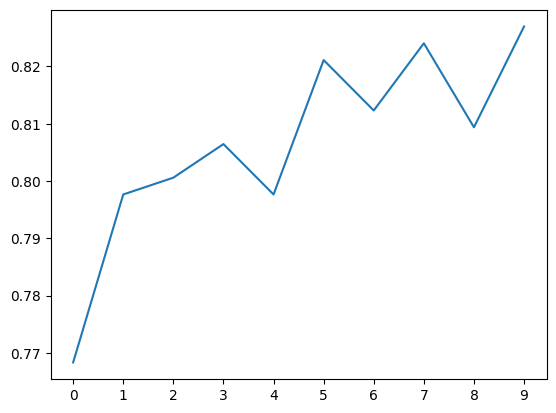

In [ ]:
plt.plot(history.history['val_accuracy'])
plt.xticks(np.arange(10))
plt.show()

## Adjusting the learning rate

In [ ]:
def make_model(learning_rate: float=0.001):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False

    inputs = tf.keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

    outputs = tf.keras.layers.Dense(10)(vectors)

    model = tf.keras.Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
scores = {}
for lr in [0.0001, 0.001, 0.01, 0.1]:
    print(f'{lr=}')
    model = make_model(lr)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[lr] = history.history

    print()
    print()

lr=0.0001
Epoch 1/10
96/96 [==============================] - 13s 96ms/step - loss: 1.8981 - accuracy: 0.3885 - val_loss: 1.5966 - val_accuracy: 0.5308
Epoch 2/10
96/96 [==============================] - 9s 96ms/step - loss: 1.3647 - accuracy: 0.5792 - val_loss: 1.2544 - val_accuracy: 0.6188
Epoch 3/10
96/96 [==============================] - 12s 120ms/step - loss: 1.1252 - accuracy: 0.6509 - val_loss: 1.0703 - val_accuracy: 0.6774
Epoch 4/10
96/96 [==============================] - 8s 85ms/step - loss: 0.9866 - accuracy: 0.6949 - val_loss: 0.9602 - val_accuracy: 0.7185
Epoch 5/10
96/96 [==============================] - 9s 89ms/step - loss: 0.8938 - accuracy: 0.7187 - val_loss: 0.8879 - val_accuracy: 0.7449
Epoch 6/10
96/96 [==============================] - 9s 93ms/step - loss: 0.8280 - accuracy: 0.7327 - val_loss: 0.8340 - val_accuracy: 0.7537
Epoch 7/10
96/96 [==============================] - 9s 90ms/step - loss: 0.7759 - accuracy: 0.7480 - val_loss: 0.7919 - val_accuracy: 0.7566


In [ ]:
_ = scores.pop(0.0001)
_ = scores.pop(0.1)

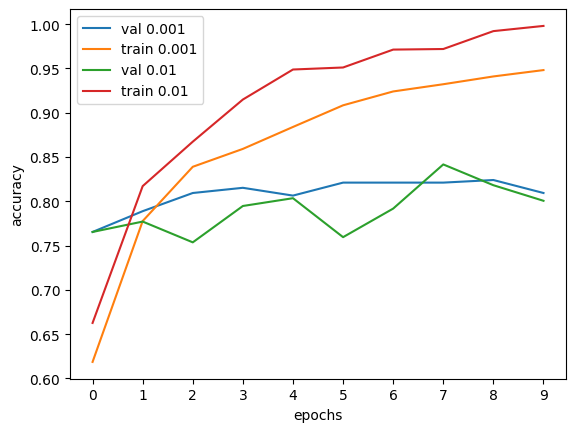

In [ ]:
for lr, score in scores.items():
    plt.plot(score['val_accuracy'], label=f'val {lr}')
    plt.plot(score['accuracy'], label=f'train {lr}')
    plt.xticks(range(10))
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

In [ ]:
learning_rate = 0.001


## Checkpoint

In [ ]:
model = make_model(learning_rate)

83683744/83683744 [==============================] - 3s 0us/step


In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

In [ ]:
'xception_v1_{epoch:02}_{val_accuracy:.3f}.h5'.format(epoch=5, val_accuracy=0.754)

'xception_v1_05_0.754.h5'

In [ ]:
model.save_weights('model_v1.h5', save_format='h5')

checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v1_{epoch:02}_{val_accuracy:.3f}.h5',
                                   save_best_only=True,
                                   monitor='val_accuracy',
                                   mode='max')

In [ ]:
history = model.fit(train_ds, epochs=10, validation_data=val_ds, callbacks=[checkpoint])

Epoch 1/10
96/96 [==============================] - ETA: 0s - loss: 1.0698 - accuracy: 0.6336

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


96/96 [==============================] - 23s 117ms/step - loss: 1.0698 - accuracy: 0.6336 - val_loss: 0.7054 - val_accuracy: 0.7654
Epoch 2/10
96/96 [==============================] - 9s 97ms/step - loss: 0.6292 - accuracy: 0.7793 - val_loss: 0.6254 - val_accuracy: 0.7918
Epoch 3/10
96/96 [==============================] - 9s 91ms/step - loss: 0.5031 - accuracy: 0.8292 - val_loss: 0.5943 - val_accuracy: 0.8328
Epoch 4/10
96/96 [==============================] - 9s 96ms/step - loss: 0.4242 - accuracy: 0.8667 - val_loss: 0.5817 - val_accuracy: 0.8094
Epoch 5/10
96/96 [==============================] - 10s 103ms/step - loss: 0.3745 - accuracy: 0.8869 - val_loss: 0.5713 - val_accuracy: 0.8065
Epoch 6/10
96/96 [==============================] - 9s 96ms/step - loss: 0.3267 - accuracy: 0.9029 - val_loss: 0.5422 - val_accuracy: 0.8240
Epoch 7/10
96/96 [==============================] - 11s 110ms/step - loss: 0.2873 - accuracy: 0.9198 - val_loss: 0.5472 - val_accuracy: 0.8211
Epoch 8/10
96/96 [

## Adding more layers

In [ ]:
def make_model(learning_rate: float=0.01, size_inner: int=100):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False

    inputs = tf.keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

    inner = tf.keras.layers.Dense(size_inner, activation='relu')(vectors)

    outputs = tf.keras.layers.Dense(10)(inner)

    model = tf.keras.Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
scores = {}
lr = 0.001
for units in [1000, 100, 10]:
    print(f'{units=}')
    model = make_model(lr, units)
    history = model.fit(train_ds, epochs=10, validation_data=val_ds)
    scores[units] = history.history

    print()
    print()

units=1000
83683744/83683744 [==============================] - 1s 0us/step
Epoch 1/10
96/96 [==============================] - 25s 133ms/step - loss: 0.9252 - accuracy: 0.6845 - val_loss: 0.6694 - val_accuracy: 0.7507
Epoch 2/10
96/96 [==============================] - 9s 89ms/step - loss: 0.4343 - accuracy: 0.8422 - val_loss: 0.5781 - val_accuracy: 0.8094
Epoch 3/10
96/96 [==============================] - 8s 82ms/step - loss: 0.2360 - accuracy: 0.9244 - val_loss: 0.5865 - val_accuracy: 0.8240
Epoch 4/10
96/96 [==============================] - 9s 89ms/step - loss: 0.1308 - accuracy: 0.9573 - val_loss: 0.6507 - val_accuracy: 0.8006
Epoch 5/10
96/96 [==============================] - 8s 87ms/step - loss: 0.0879 - accuracy: 0.9775 - val_loss: 0.6554 - val_accuracy: 0.8182
Epoch 6/10
96/96 [==============================] - 8s 83ms/step - loss: 0.0428 - accuracy: 0.9922 - val_loss: 0.7051 - val_accuracy: 0.8094
Epoch 7/10
96/96 [==============================] - 9s 89ms/step - loss: 0.0

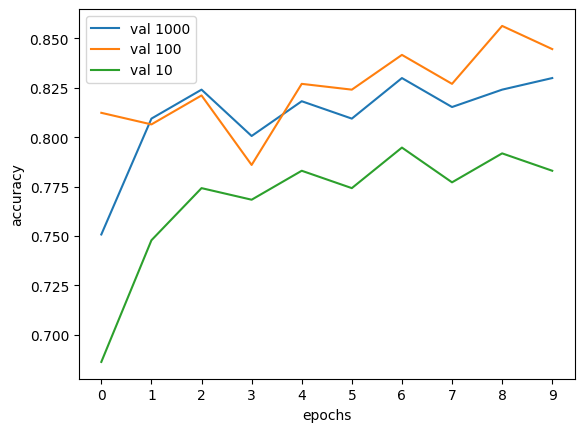

In [ ]:
for lr, score in scores.items():
    plt.plot(score['val_accuracy'], label=f'val {lr}')
    #plt.plot(score['accuracy'], label=f'train {lr}')
    plt.xticks(range(10))
    plt.xlabel('epochs')
    plt.ylabel('accuracy')
    plt.legend()

## Regularization and Dropout

In [12]:
def make_model(learning_rate:float, size_inner:int, rate:float):
    base_model = Xception(weights='imagenet', include_top=False, input_shape=(150,150,3))
    base_model.trainable=False

    inputs = tf.keras.Input(shape=(150,150,3))

    base = base_model(inputs, training=False)

    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

    inner = tf.keras.layers.Dense(size_inner, activation='relu')(vectors)

    dropout = tf.keras.layers.Dropout(rate)

    outputs = tf.keras.layers.Dense(10)(inner)

    model = tf.keras.Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [ ]:
learning_rate: float = 0.001
size_inner: int = 100

scores = {}
for droprate in [0.0, 0.2, 0.5, 0.8]:
    print(f'{droprate=}')
    model = make_model(learning_rate, size_inner, droprate)
    history = model.fit(train_ds, epochs=30, validation_data=val_ds)
    scores[droprate] = history.history

    print()
    print()

droprate=0.0
83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/30
96/96 [==============================] - 22s 109ms/step - loss: 0.9395 - accuracy: 0.6757 - val_loss: 0.6258 - val_accuracy: 0.7830
Epoch 2/30
96/96 [==============================] - 9s 95ms/step - loss: 0.4919 - accuracy: 0.8354 - val_loss: 0.6056 - val_accuracy: 0.7947
Epoch 3/30
96/96 [==============================] - 8s 80ms/step - loss: 0.3567 - accuracy: 0.8797 - val_loss: 0.5605 - val_accuracy: 0.8211
Epoch 4/30
96/96 [==============================] - 8s 88ms/step - loss: 0.2525 - accuracy: 0.9185 - val_loss: 0.5706 - val_accuracy: 0.8035
Epoch 5/30
96/96 [==============================] - 9s 93ms/step - loss: 0.1666 - accuracy: 0.9570 - val_loss: 0.5849 - val_accuracy: 0.8270
Epoch 6/30
96/96 [==============================] - 8s 80ms/step - loss: 0.1114 - accuracy: 0.9775 - val_loss: 0.5695 - val_accuracy: 0.8270
Epoch 7/30
96/96 [==============================] - 8s 88ms/step - loss: 0

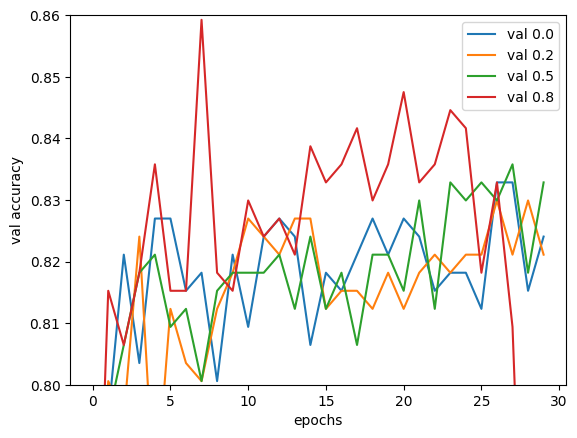

In [ ]:
for droprate, score in scores.items():
    plt.plot(score['val_accuracy'], label=f'val {droprate}')
    plt.xlabel('epochs')
    plt.ylabel('val accuracy')
    plt.ylim(0.8, 0.86)
    plt.legend()

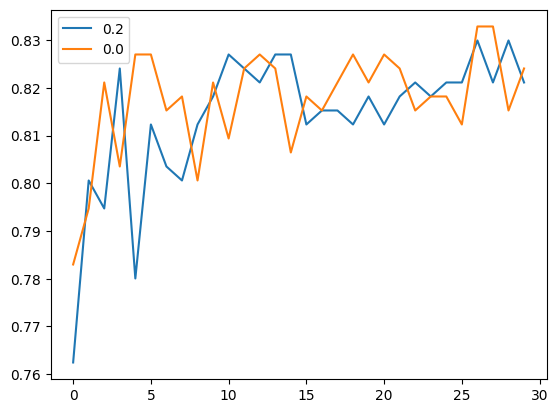

In [ ]:
hist = scores[0.2]
plt.plot(hist['val_accuracy'], label=0.2)

hist = scores[0.0]
plt.plot(hist['val_accuracy'], label=0.0)

plt.legend()

In [ ]:
dropout_rate = 0.2

## Data Augmentation

In [9]:
train_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input,
    shear_range=10.0,
    zoom_range=0.1,
    vertical_flip=True
)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/', target_size=(150,150), batch_size=32)

val_gen = ImageDataGenerator(
    preprocessing_function=preprocess_input
)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation//', target_size=(150,150), batch_size=32)

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.


In [13]:
learning_rate:float = 0.001
size_inner:int = 100
droprate:float = 0.2

model = make_model(learning_rate, size_inner, droprate)

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds)

83683744/83683744 [==============================] - 0s 0us/step
Epoch 1/50
96/96 [==============================] - 35s 257ms/step - loss: 1.2017 - accuracy: 0.6040 - val_loss: 0.7582 - val_accuracy: 0.7478
Epoch 2/50
96/96 [==============================] - 24s 251ms/step - loss: 0.8001 - accuracy: 0.7379 - val_loss: 0.6777 - val_accuracy: 0.7742
Epoch 3/50
96/96 [==============================] - 25s 263ms/step - loss: 0.6810 - accuracy: 0.7650 - val_loss: 0.6658 - val_accuracy: 0.7801
Epoch 4/50
96/96 [==============================] - 24s 247ms/step - loss: 0.6169 - accuracy: 0.7947 - val_loss: 0.6656 - val_accuracy: 0.7771
Epoch 5/50
96/96 [==============================] - 24s 246ms/step - loss: 0.5642 - accuracy: 0.8061 - val_loss: 0.6110 - val_accuracy: 0.8065
Epoch 6/50
96/96 [==============================] - 23s 240ms/step - loss: 0.5066 - accuracy: 0.8233 - val_loss: 0.6599 - val_accuracy: 0.7771
Epoch 7/50
96/96 [==============================] - 25s 258ms/step - loss: 0.

In [18]:
hist = history.history

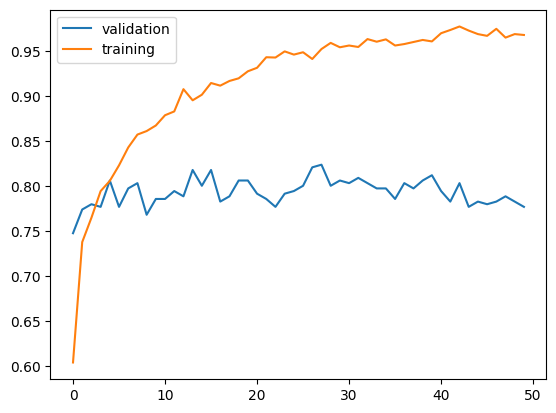

In [19]:
plt.plot(hist['val_accuracy'], label='validation')
plt.plot(hist['accuracy'], label='training')
plt.legend()

## Training a larger model

Train a 299x299 model

In [77]:
def make_model(learning_rate:float, size_inner:int, rate:float, input_shape:int):
    base_model = Xception(weights='imagenet',
                          include_top=False,
                          input_shape=(input_shape, input_shape, 3))

    base_model.trainable=False

    inputs = tf.keras.Input(shape=(input_shape, input_shape,3))

    base = base_model(inputs, training=False)

    vectors = tf.keras.layers.GlobalAveragePooling2D()(base)

    inner = tf.keras.layers.Dense(size_inner, activation='relu')(vectors)

    dropout = tf.keras.layers.Dropout(rate)

    outputs = tf.keras.layers.Dense(10)(inner)

    model = tf.keras.Model(inputs, outputs)

    optimizer = tf.keras.optimizers.Adam(learning_rate=learning_rate)
    loss = tf.keras.losses.CategoricalCrossentropy(from_logits=True)

    model.compile(optimizer=optimizer, loss=loss, metrics=['accuracy'])

    return model

In [79]:
learning_rate:float = 0.0005
size_inner:int = 100
droprate:float = 0.2
input_shape:int = 299

model = make_model(learning_rate, size_inner, droprate, input_shape)

checkpoint = tf.keras.callbacks.ModelCheckpoint('xception_v4_1_{epoch:02}_{val_accuracy:.3f}.h5',
                                   save_best_only=True,
                                   monitor='val_accuracy',
                                   mode='max')

train_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

train_ds = train_gen.flow_from_directory('./clothing-dataset-small/train/',
                                         target_size=(input_shape, input_shape),
                                         batch_size=32)

val_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

val_ds = val_gen.flow_from_directory('./clothing-dataset-small/validation//',
                                     target_size=(input_shape, input_shape),
                                     batch_size=32)

history = model.fit(train_ds,
                    epochs=50,
                    validation_data=val_ds,
                    callbacks=[checkpoint]
                    )

Found 3068 images belonging to 10 classes.
Found 341 images belonging to 10 classes.
Epoch 1/50
96/96 [==============================] - 30s 285ms/step - loss: 0.8429 - accuracy: 0.7360 - val_loss: 0.5024 - val_accuracy: 0.8475
Epoch 2/50
96/96 [==============================] - 27s 276ms/step - loss: 0.4134 - accuracy: 0.8638 - val_loss: 0.4174 - val_accuracy: 0.8592
Epoch 3/50
96/96 [==============================] - 28s 295ms/step - loss: 0.3277 - accuracy: 0.8960 - val_loss: 0.4050 - val_accuracy: 0.8680
Epoch 4/50
96/96 [==============================] - 26s 273ms/step - loss: 0.2779 - accuracy: 0.9035 - val_loss: 0.3744 - val_accuracy: 0.8768
Epoch 5/50
96/96 [==============================] - 27s 278ms/step - loss: 0.2413 - accuracy: 0.9188 - val_loss: 0.3595 - val_accuracy: 0.8856
Epoch 6/50
96/96 [==============================] - 26s 266ms/step - loss: 0.2093 - accuracy: 0.9309 - val_loss: 0.3632 - val_accuracy: 0.8798
Epoch 7/50
96/96 [==============================] - 26s 2

KeyboardInterrupt: ignored

## Using the model

In [4]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img
from tensorflow.keras.applications.xception import preprocess_input
from tensorflow import keras
import numpy as np

In [80]:
MODEL_NAME = 'xception_v4_08_0.894.h5'
model = keras.models.load_model(MODEL_NAME)

In [81]:
test_gen = ImageDataGenerator(preprocessing_function=preprocess_input)

test_ds = test_gen.flow_from_directory('./clothing-dataset-small/test/',
                                       batch_size=32,
                                       shuffle=False)

Found 372 images belonging to 10 classes.


In [82]:
model.evaluate(test_ds)

12/12 [==============================] - 3s 159ms/step - loss: 0.3144 - accuracy: 0.8817


[0.31441953778266907, 0.8817204236984253]

In [5]:
image_path = './clothing-dataset-small/test/pants/05814dc4-0520-47e6-91e0-402a971ba40a.jpg'
img = load_img(image_path, target_size=(299, 299))
X = np.array(img)
X = np.expand_dims(X, 0)

print(X.shape)

(1, 299, 299, 3)


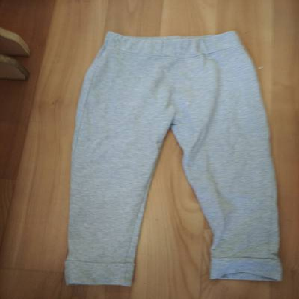

In [6]:
img

In [116]:
!ls './clothing-dataset-small/test/'

dress  hat  longsleeve	outwear  pants	shirt  shoes  shorts  skirt  t-shirt


In [117]:
classes = [
    'dress',
    'hat',
    'longsleeve',
	'outwear',
    'pants',
	'shirt',
    'shoes',
    'shorts',
    'skirt',
    't-shirt']

In [118]:
X = preprocess_input(X)
pred = model.predict(X)

1/1 [==============================] - 0s 23ms/step


In [124]:
sorted(zip(classes, pred.squeeze()), key=lambda x:-x[1])

[('pants', 7.5840025),
 ('shorts', 3.1492338),
 ('outwear', -0.0018626307),
 ('longsleeve', -0.44594604),
 ('shirt', -0.5447021),
 ('dress', -1.5777243),
 ('t-shirt', -2.0272188),
 ('shoes', -2.9289327),
 ('skirt', -3.323143),
 ('hat', -4.5219064)]